In [ ]:
# Mounting Google Drive for Dataset Access
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Importing Libraries and Dataset

In [ ]:
# Importing Libraries

# Standard Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

# Machine Learning Libraries
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Configurations
pd.set_option('display.max_columns', None)

In [ ]:
# Load Dataset
taxi_df = pd.read_csv("/content/gdrive/MyDrive/NYC Taxi Data/sampled_data/taxi_df_sample.csv")

In [ ]:
# Viewing Columns and its Types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845985 entries, 0 to 845984
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             845985 non-null  int64  
 1   VendorID               845985 non-null  int64  
 2   tpep_pickup_datetime   845985 non-null  object 
 3   tpep_dropoff_datetime  845985 non-null  object 
 4   passenger_count        841588 non-null  float64
 5   trip_distance          845985 non-null  float64
 6   RatecodeID             841588 non-null  float64
 7   store_and_fwd_flag     841588 non-null  object 
 8   PULocationID           845985 non-null  int64  
 9   DOLocationID           845985 non-null  int64  
 10  payment_type           845985 non-null  int64  
 11  fare_amount            845985 non-null  float64
 12  extra                  845985 non-null  float64
 13  mta_tax                845985 non-null  float64
 14  tip_amount             845985 non-nu

In [ ]:
# Changing tpep_pickup_datetime and tpep_dropoff_datetime columns datatype to datetime
taxi_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = taxi_df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime)

In [ ]:
# Drop Unnamed: 0
taxi_df = taxi_df.drop('Unnamed: 0', axis = 1)

In [ ]:
# Checking Data for pickup_year and dropoff_year which do not belong in 2019
taxi_df['pickup_year'] = taxi_df.tpep_pickup_datetime.dt.year
taxi_df['dropoff_year'] = taxi_df.tpep_dropoff_datetime.dt.year
taxi_df[(taxi_df['pickup_year'] != 2019) & (taxi_df['dropoff_year'] != 2019)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour,pickup_year,dropoff_year
1262,2,2009-01-01 00:04:26,2009-01-01 00:04:29,1.0,0.00,1.0,N,193,193,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,3,0,3,0,2009,2009
3305,2,2009-01-01 01:09:03,2009-01-01 01:14:49,1.0,0.62,1.0,N,75,236,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,NaN,NaN,3,1,3,1,2009,2009
77445,2,2009-01-01 00:08:23,2009-01-01 00:35:08,1.0,10.38,1.0,N,138,163,2,31.0,0.5,0.5,0.00,5.76,0.3,40.56,2.5,NaN,3,0,3,0,2009,2009
134812,2,2038-02-17 20:41:09,2038-02-18 00:03:11,1.0,0.56,1.0,N,262,140,1,4.0,0.5,0.5,1.56,0.00,0.3,9.36,2.5,NaN,2,20,3,0,2038,2038
230244,2,2009-01-01 02:30:02,2009-01-01 20:06:42,3.0,1.10,1.0,N,142,48,1,6.5,1.0,0.5,2.16,0.00,0.3,12.96,2.5,NaN,3,2,3,20,2009,2009
545211,2,2020-03-02 16:01:27,2020-03-02 16:06:46,2.0,0.86,1.0,N,151,238,3,-5.5,0.0,-0.5,0.00,0.00,-0.3,-8.80,-2.5,NaN,0,16,0,16,2020,2020
580164,2,2020-05-03 07:30:20,2020-05-03 14:35:26,1.0,0.80,1.0,N,79,224,1,5.0,1.0,0.5,1.86,0.00,0.3,11.16,2.5,NaN,6,7,6,14,2020,2020
652774,2,2020-02-07 09:36:51,2020-02-07 10:01:04,1.0,7.28,1.0,N,233,152,1,24.0,0.0,0.5,5.46,0.00,0.3,32.76,2.5,NaN,4,9,4,10,2020,2020
716875,2,2020-05-17 07:09:02,2020-05-17 07:18:44,1.0,1.63,1.0,N,186,113,2,8.5,0.0,0.5,0.00,0.00,0.3,11.80,2.5,NaN,6,7,6,7,2020,2020
723045,2,2020-02-07 09:07:53,2020-02-07 09:24:21,1.0,1.60,1.0,N,52,97,1,11.5,1.0,0.5,3.32,0.00,0.3,16.62,0.0,NaN,4,9,4,9,2020,2020


In [ ]:
# Dropping Data for different years which are not 2019, as it is not intended to be part of our research dataset
taxi_df.drop(taxi_df[(taxi_df['pickup_year'] != 2019) & (taxi_df['dropoff_year'] != 2019)].index, inplace = True)

In [ ]:
# Checking Data for pickup_year - 2018 and dropoff_year - 2019
taxi_df[(taxi_df['pickup_year'] == 2019) & (taxi_df['dropoff_year'] != 2019)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour,pickup_year,dropoff_year
793998,2,2019-12-31 10:51:24,2020-01-01 08:43:18,2.0,7.53,1.0,N,132,93,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,0.0,NaN,1,10,2,8,2019,2020
804032,2,2019-12-31 13:51:51,2020-01-01 10:35:52,5.0,10.71,1.0,N,138,40,1,33.5,0.0,0.5,5.14,0.00,0.3,39.44,0.0,NaN,1,13,2,10,2019,2020
804145,2,2019-12-31 13:24:42,2020-01-01 12:59:10,1.0,13.81,1.0,N,138,148,1,38.5,0.0,0.5,4.79,6.12,0.3,52.71,2.5,NaN,1,13,2,12,2019,2020
813457,2,2019-12-31 15:25:16,2020-01-01 15:13:36,1.0,1.08,1.0,N,234,114,1,6.0,0.0,0.5,1.40,0.00,0.3,10.70,2.5,NaN,1,15,2,15,2019,2020
823528,2,2019-12-31 18:12:56,2020-01-01 18:09:24,5.0,2.81,1.0,N,238,48,2,13.0,1.0,0.5,0.00,0.00,0.3,17.30,2.5,NaN,1,18,2,18,2019,2020
825210,2,2019-12-31 18:08:49,2020-01-01 17:29:22,2.0,2.74,1.0,N,246,162,1,14.0,1.0,0.5,0.00,0.00,0.3,18.30,2.5,NaN,1,18,2,17,2019,2020
829319,2,2019-12-31 19:22:41,2020-01-01 18:36:49,4.0,0.87,1.0,N,229,229,4,-5.5,-1.0,-0.5,0.00,0.00,-0.3,-9.80,-2.5,NaN,1,19,2,18,2019,2020
838563,2,2019-12-31 21:32:16,2020-01-01 21:19:42,1.0,0.38,1.0,N,48,48,2,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,NaN,1,21,2,21,2019,2020
843845,2,2019-12-31 23:50:31,2020-01-01 00:07:27,1.0,3.72,1.0,N,238,164,2,15.0,0.5,0.5,0.00,0.00,0.3,18.80,2.5,NaN,1,23,2,0,2019,2020
844500,2,2019-12-31 23:33:02,2020-01-01 00:00:44,1.0,5.38,1.0,N,170,24,1,21.5,0.5,0.5,5.06,0.00,0.3,30.36,2.5,NaN,1,23,2,0,2019,2020


In [ ]:
# Drop pickup_year and dropoff_year
taxi_df = taxi_df.drop('pickup_year', axis = 1)
taxi_df = taxi_df.drop('dropoff_year', axis = 1)

Loading Data Insight
1. Analysis indicates that the data for year 2019 also had few records from different years.
2. Our intended scope for dataset in addressing the research question was only to be on the year 2019.
3. This constraint was kept as the NYC Taxi Dataset is a massive big dataset consisting of more than 600,000 rows for every month for every year.
4. Handling such big data puts forth issues of Out-Of-Memory Usage and managing time complexity.
5. These are not the issues we are looking to consider and is in any way connected to the research question.
6. Therefore, any data regarding year 2018 or any other year, is not going to be our intended scope for dataset.
7. So the records associated with that year were curtailed.

In [ ]:
# Viewing Shape, First and Last Five Observations of the taxi dataframe.
print(taxi_df.shape)
print(taxi_df.head())
print(taxi_df.tail())

(845971, 23)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2019-01-19 00:44:05   2019-01-19 00:52:43              3.0   
1         2  2019-01-04 00:51:31   2019-01-04 01:01:01              2.0   
2         2  2019-01-25 00:03:40   2019-01-25 00:13:31              5.0   
3         2  2019-01-05 00:26:16   2019-01-05 00:41:02              1.0   
4         1  2019-01-25 00:31:18   2019-01-25 00:35:07              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.39         1.0                  N            37           157   
1           2.05         1.0                  N           140           236   
2           2.62         1.0                  N           148           186   
3           4.72         1.0                  N           158           238   
4           0.40         1.0                  N           148           232   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tol

In [ ]:
# Viewing Columns and its Types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845971 entries, 0 to 845984
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               845971 non-null  int64         
 1   tpep_pickup_datetime   845971 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  845971 non-null  datetime64[ns]
 3   passenger_count        841574 non-null  float64       
 4   trip_distance          845971 non-null  float64       
 5   RatecodeID             841574 non-null  float64       
 6   store_and_fwd_flag     841574 non-null  object        
 7   PULocationID           845971 non-null  int64         
 8   DOLocationID           845971 non-null  int64         
 9   payment_type           845971 non-null  int64         
 10  fare_amount            845971 non-null  float64       
 11  extra                  845971 non-null  float64       
 12  mta_tax                845971 non-null  floa

In [ ]:
# Basic Descriptive Statistics
taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
count,845971.000000,841574.000000,845971.000000,841574.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,845971.000000,793089.000000,0.0,845971.000000,845971.000000,845971.000000,845971.000000
mean,1.647062,1.560874,3.017311,1.061419,163.150208,161.388237,1.282076,13.352206,1.091728,0.494213,2.189353,0.384282,0.298585,19.129239,2.195382,NaN,2.978096,13.885485,2.981731,13.931690
std,0.497609,1.206330,3.942597,0.774436,66.034393,70.292152,0.486338,13.034955,1.251658,0.062218,2.794389,1.778651,0.028134,15.680144,0.829588,NaN,1.933213,6.021391,1.935693,6.108027
min,1.000000,0.000000,-22.230000,1.000000,1.000000,1.000000,0.000000,-200.000000,-4.500000,-0.500000,-63.130000,-12.500000,-0.300000,-202.800000,-2.500000,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.980000,1.000000,116.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.150000,2.500000,NaN,1.000000,10.000000,1.000000,10.000000
50%,2.000000,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.750000,2.500000,NaN,3.000000,15.000000,3.000000,15.000000
75%,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,15.000000,2.500000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,NaN,5.000000,19.000000,5.000000,19.000000
max,5.000000,9.000000,123.400000,99.000000,265.000000,265.000000,5.000000,3008.500000,87.560000,1.440000,243.700000,612.000000,0.300000,3012.800000,2.750000,NaN,6.000000,23.000000,6.000000,23.000000


# Data Preprocessing
## Data Cleaning and Feature Engineering

## Missing Data Identification and Handling

These include NaN and zero data. We also check for duplicates.


In [ ]:
# Null Check on current columns of the NYC Data.
taxi_df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            4397
trip_distance                 0
RatecodeID                 4397
store_and_fwd_flag         4397
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      52882
airport_fee              845971
pickup_day                    0
pickup_hour                   0
dropoff_day                   0
dropoff_hour                  0
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns
computeNullPercent = (taxi_df.isnull().sum()/len(taxi_df)) * 100
computeNullPercent

VendorID                   0.000000
tpep_pickup_datetime       0.000000
tpep_dropoff_datetime      0.000000
passenger_count            0.519758
trip_distance              0.000000
RatecodeID                 0.519758
store_and_fwd_flag         0.519758
PULocationID               0.000000
DOLocationID               0.000000
payment_type               0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
improvement_surcharge      0.000000
total_amount               0.000000
congestion_surcharge       6.251042
airport_fee              100.000000
pickup_day                 0.000000
pickup_hour                0.000000
dropoff_day                0.000000
dropoff_hour               0.000000
dtype: float64

# Sort This Visualization

In [ ]:
# Calculate the percentage of missing values in each column
# missing_data = taxi_df.isnull().sum() / len(taxi_df) * 100

# # Sort the columns by percentage of missing values
# missing_data = missing_data.sort_values(ascending=False)

# # Plot the percentage of missing values for each column
# plt.figure(figsize=(12, 6))
# plt.bar(missing_data.index, missing_data)
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Percentage of missing values')
# plt.title('Missing Data')
# plt.show()

# Sort This Visualization

In [ ]:
# Calculate the percentage of missing values
# missing_data = (taxi_df[taxi_df == 0].count()/len(taxi_df)) * 100

# # Sort the columns by percentage of missing values
# missing_data = missing_data.sort_values(ascending=False)

# # View Index Order of Entries
# print(missing_data.index)
# print(missing_data[5])

# # Plot the percentage of missing values for each column
# plt.figure(figsize=(8, 6))
# plt.bar(missing_data.index[[8, 19, 18, 5, 20]], missing_data[['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']])
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Percentage of Missing data')
# plt.title('Missing Data')
# plt.show()

Missing Data Insights
1. airport_fee has 100% of NaN values. Need to investigate the reason and handle it accordingly.
2. Missing Data for passenger_count, RatecodeID and store_and_fwd_flag will be removed as they comprised less than 1%. It is observed that null values of the columns RatecodeID and store_and_fwd_flag share the same rows as that of passenger_count. Perhaps removing NaN values for passenger_count may lead to removal of NaN values for RatecodeID and store_and_fwd_flag as well.
3. congestion_surcharge comprises of about 6.25% of the missing data. We need to handle it differently apart from removal.

In [ ]:
# Zero Data Check on current columns in NYC Data, RatecodeID, store_and_fwd_flag
taxi_df[taxi_df == 0].count()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           15263
trip_distance              7380
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type               4397
fare_amount                 323
extra                    316863
mta_tax                    6393
tip_amount               263281
tolls_amount             795904
improvement_surcharge       523
total_amount                198
congestion_surcharge      94155
airport_fee                   0
pickup_day               109814
pickup_hour               24982
dropoff_day              109860
dropoff_hour              27403
dtype: int64

In [ ]:
# Percentage of all Zero Data Columns
computeZeroDataPercent = (taxi_df[taxi_df == 0].count()/len(taxi_df)) * 100
computeZeroDataPercent

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           1.804199
trip_distance             0.872370
RatecodeID                0.000000
store_and_fwd_flag        0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.519758
fare_amount               0.038181
extra                    37.455539
mta_tax                   0.755700
tip_amount               31.121752
tolls_amount             94.081712
improvement_surcharge     0.061822
total_amount              0.023405
congestion_surcharge     11.129814
airport_fee               0.000000
pickup_day               12.980823
pickup_hour               2.953056
dropoff_day              12.986261
dropoff_hour              3.239236
dtype: float64

# Sort This Visualization

In [ ]:
# Calculate the percentage of zero values in each column
# zero_data = (taxi_df[taxi_df == 0].count()/len(taxi_df)) * 100

# # Sort the columns by percentage of zero values
# zero_data = zero_data.sort_values(ascending=False)

# # Plot the percentage of zero values for each column
# plt.figure(figsize=(12, 6))
# plt.bar(zero_data.index, zero_data)
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Percentage of zero data')
# plt.title('Zero Data')
# plt.show()

# Sort This Visualization

In [ ]:
# Calculate the percentage of zero values
# zero_data = (taxi_df[taxi_df == 0].count()/len(taxi_df)) * 100

# # Sort the columns by percentage of zero values
# zero_data = zero_data.sort_values(ascending=False)

# # Plot the percentage of zero values for each column
# plt.figure(figsize=(8, 6))
# plt.bar(zero_data.index[[3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]], zero_data[['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'pickup_day', 'pickup_hour', 'dropoff_day', 'dropoff_hour']])
# plt.xticks(rotation=90)
# plt.xlabel('Columns')
# plt.ylabel('Percentage of zero data')
# plt.title('Zero Data')
# plt.show()

Zero Data Insights
1. Check why passenger_count is zero. If there are any trip amount recorded, need a check on that. Also check if there are different pickup and dropoff locations.
2. Check why trip_distance is zero. If there are any trip amount recorded, need a check on that. Also check if there are different pickup and dropoff locations.
3. Check also passenger_count and trip_distance together, as to possibility of trip amount. Also check if there are different pickup and dropoff locations.
4. Check why payment_type is zero. Also look at any amount recorded against it. Also check if there are different pickup and dropoff locations.
5. Check for total_amount == 0. Here check if there rides have taken place if there are different pickup and dropoff locations. Also check if any amounts are registered. 

In [ ]:
# Check for Duplicate Data across all columns in NYC Data
duplicateRows = taxi_df[taxi_df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_day, pickup_hour, dropoff_day, dropoff_hour]
Index: []


## Airport Fee Analysis

In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at PULocationID = 1 - Newark Airport
taxi_df[(taxi_df['PULocationID'] == 1) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
821694,1,2019-12-05 17:09:38,2019-12-05 17:09:55,1.0,16.9,2.0,N,1,1,1,52.0,4.5,0.5,42.7,0.0,0.3,100.0,0.0,NaN,3,17,3,17


In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at DOLocationID = 1 - Newark Airport
taxi_df[(taxi_df['DOLocationID'] == 1) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
609609,2,2019-09-16 16:12:01,2019-09-17 16:10:53,2.0,15.76,2.0,N,68,1,1,52.0,4.5,0.5,28.92,12.5,0.3,101.22,2.5,NaN,0,16,1,16
821694,1,2019-12-05 17:09:38,2019-12-05 17:09:55,1.0,16.90,2.0,N,1,1,1,52.0,4.5,0.5,42.70,0.0,0.3,100.00,0.0,NaN,3,17,3,17


In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at PULocationID = 132 - JFK Airport
taxi_df[(taxi_df['PULocationID'] == 132) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
149,1,2019-01-13 00:41:07,2019-01-13 01:11:15,1.0,22.40,2.0,N,132,243,1,52.0,0.0,0.5,8.78,5.76,0.3,67.34,NaN,NaN,6,0,6,1
159,2,2019-01-08 00:39:21,2019-01-08 00:59:38,1.0,16.83,2.0,N,132,74,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,NaN,NaN,1,0,1,0
178,2,2019-01-10 00:44:14,2019-01-10 01:14:31,1.0,18.85,2.0,N,132,90,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56,NaN,NaN,3,0,3,1
335,1,2019-01-28 00:20:47,2019-01-28 00:47:53,1.0,18.00,2.0,N,132,230,1,52.0,0.0,0.5,11.70,5.76,0.3,70.26,0.0,NaN,0,0,0,0
345,2,2019-01-11 00:01:14,2019-01-11 00:28:40,1.0,19.00,2.0,N,132,263,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,NaN,NaN,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845587,2,2019-12-11 23:29:05,2019-12-12 00:00:52,1.0,18.60,2.0,Y,132,163,1,52.0,0.0,0.5,11.06,0.00,0.3,66.36,2.5,NaN,2,23,3,0
845692,2,2019-12-15 23:53:41,2019-12-16 00:33:22,5.0,22.85,2.0,N,132,231,1,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5,NaN,6,23,0,0
845737,2,2019-12-15 23:10:32,2019-12-15 23:42:02,5.0,20.91,2.0,N,132,87,2,52.0,0.0,0.5,0.00,0.00,0.3,55.30,2.5,NaN,6,23,6,23
845757,2,2019-12-04 23:55:35,2019-12-05 00:25:32,1.0,19.00,2.0,N,132,166,1,52.0,0.0,0.5,11.78,6.12,0.3,70.70,0.0,NaN,2,23,3,0


In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at DOLocationID = 132 - JFK Airport
taxi_df[(taxi_df['DOLocationID'] == 132) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
534,2,2019-01-05 00:10:39,2019-01-05 00:36:25,1.0,16.75,2.0,N,148,132,1,52.0,0.0,0.5,13.20,0.00,0.3,66.00,NaN,NaN,5,0,5,0
1753,2,2019-01-21 00:28:47,2019-01-21 01:25:38,1.0,25.89,2.0,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.0,NaN,0,0,0,1
4959,2,2019-01-10 03:34:09,2019-01-10 03:58:14,5.0,16.42,2.0,N,234,132,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,NaN,NaN,3,3,3,3
5081,2,2019-01-25 03:50:27,2019-01-25 04:28:00,1.0,21.62,2.0,N,249,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.0,NaN,4,3,4,4
5367,2,2019-01-04 03:22:30,2019-01-04 03:47:59,5.0,16.83,2.0,N,100,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,NaN,NaN,4,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841923,1,2019-12-03 22:53:38,2019-12-03 23:17:03,1.0,16.30,2.0,N,162,132,1,52.0,2.5,0.5,12.25,6.12,0.3,73.67,2.5,NaN,1,22,1,23
842459,1,2019-12-20 22:25:14,2019-12-20 23:22:04,1.0,17.80,2.0,N,48,132,1,52.0,2.5,0.5,10.00,0.00,0.3,65.30,2.5,NaN,4,22,4,23
842858,2,2019-12-08 22:54:30,2019-12-08 23:19:08,1.0,15.83,2.0,N,233,132,2,52.0,0.0,0.5,0.00,6.12,0.3,61.42,2.5,NaN,6,22,6,23
842983,2,2019-12-29 22:44:23,2019-12-29 23:18:26,1.0,18.53,2.0,N,166,132,1,52.0,0.0,0.5,17.68,6.12,0.3,76.60,0.0,NaN,6,22,6,23


In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at PULocationID = 138 - LaGuardia Airport
taxi_df[(taxi_df['PULocationID'] == 138) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
23268,2,2019-01-26 11:23:25,2019-01-26 11:44:13,1.0,9.26,2.0,N,138,163,1,52.0,0.0,0.5,5.00,5.76,0.3,63.56,0.0,NaN,5,11,5,11
45454,1,2019-01-22 16:26:53,2019-01-22 16:26:55,2.0,0.00,2.0,N,138,138,3,52.0,4.5,0.5,0.00,0.00,0.3,57.30,0.0,NaN,1,16,1,16
49518,2,2019-01-21 17:15:21,2019-01-21 17:50:06,1.0,16.79,2.0,N,138,138,1,52.0,0.0,0.5,6.00,5.76,0.3,64.56,0.0,NaN,0,17,0,17
50594,1,2019-01-23 17:48:49,2019-01-23 18:18:31,2.0,8.90,2.0,N,138,238,1,52.0,4.5,0.5,12.60,5.76,0.3,75.66,0.0,NaN,2,17,2,18
52748,2,2019-01-27 18:24:09,2019-01-27 18:24:47,2.0,0.05,2.0,N,138,138,2,-52.0,0.0,-0.5,0.00,0.00,-0.3,-52.80,0.0,NaN,6,18,6,18
121066,2,2019-02-11 17:59:31,2019-02-11 17:59:39,1.0,0.00,2.0,N,138,138,2,52.0,4.5,0.5,0.00,0.00,0.3,57.30,0.0,NaN,0,17,0,17
123135,1,2019-02-15 17:15:45,2019-02-15 17:40:11,1.0,7.30,2.0,N,138,236,1,52.0,7.0,0.5,19.65,5.76,0.3,85.21,2.5,NaN,4,17,4,17
158841,2,2019-03-06 07:01:17,2019-03-06 07:33:37,1.0,9.67,2.0,N,138,239,1,52.0,0.0,0.5,12.21,5.76,0.3,73.27,2.5,NaN,2,7,2,7
172803,2,2019-03-25 11:52:48,2019-03-25 11:52:59,1.0,0.00,2.0,N,138,138,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,0.0,NaN,0,11,0,11
203630,2,2019-03-12 18:35:39,2019-03-12 18:35:56,1.0,0.65,2.0,N,138,138,1,52.0,4.5,0.5,12.61,5.76,0.3,75.67,0.0,NaN,1,18,1,18


In [ ]:
# Checking total_amount calculation for any involvement of airport_fee at DOLocationID = 138 - LaGuardia Airport
taxi_df[(taxi_df['DOLocationID'] == 138) & (taxi_df['RatecodeID'] == 2)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_hour,dropoff_day,dropoff_hour
45454,1,2019-01-22 16:26:53,2019-01-22 16:26:55,2.0,0.00,2.0,N,138,138,3,52.0,4.5,0.5,0.00,0.00,0.3,57.30,0.0,NaN,1,16,1,16
49518,2,2019-01-21 17:15:21,2019-01-21 17:50:06,1.0,16.79,2.0,N,138,138,1,52.0,0.0,0.5,6.00,5.76,0.3,64.56,0.0,NaN,0,17,0,17
52748,2,2019-01-27 18:24:09,2019-01-27 18:24:47,2.0,0.05,2.0,N,138,138,2,-52.0,0.0,-0.5,0.00,0.00,-0.3,-52.80,0.0,NaN,6,18,6,18
121066,2,2019-02-11 17:59:31,2019-02-11 17:59:39,1.0,0.00,2.0,N,138,138,2,52.0,4.5,0.5,0.00,0.00,0.3,57.30,0.0,NaN,0,17,0,17
133270,2,2019-02-15 20:34:15,2019-02-15 20:34:21,5.0,0.00,2.0,N,264,138,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.0,NaN,4,20,4,20
172803,2,2019-03-25 11:52:48,2019-03-25 11:52:59,1.0,0.00,2.0,N,138,138,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,0.0,NaN,0,11,0,11
180697,2,2019-03-30 13:48:20,2019-03-30 14:09:32,1.0,9.40,2.0,N,163,138,1,52.0,0.0,0.5,12.21,5.76,0.3,73.27,2.5,NaN,5,13,5,14
203630,2,2019-03-12 18:35:39,2019-03-12 18:35:56,1.0,0.65,2.0,N,138,138,1,52.0,4.5,0.5,12.61,5.76,0.3,75.67,0.0,NaN,1,18,1,18
311182,2,2019-05-26 07:43:01,2019-05-27 00:00:00,1.0,8.64,2.0,N,233,138,1,52.0,0.0,0.5,0.00,6.12,0.3,61.42,2.5,NaN,6,7,0,0
324379,1,2019-05-29 11:03:35,2019-05-29 11:41:21,1.0,11.20,2.0,N,142,138,1,52.0,2.5,0.5,15.35,6.12,0.3,76.77,2.5,NaN,2,11,2,11


## Airport Fee Feature Drop
1. It is observed that all the values in the airport column are set to NaN.
2. As specified in the metadata dictionary provided for Yellow Taxis of NYC, $1.25 will be the standard airport fee for pick up only at LaGuardia and John F. Kennedy Airports.
3. In the data, we have records of three airports - Newark, LaGuardia and John F. Kennedy Airports.
3. Investigation reveals that upon calculating the total amount, the airport fees were not taken into consideration. Here we have also taken the Newark Airport, just to check if there is any particular record of airport fee participation in total_amount.
4. Even for RateCodeID = 2, which is standard rate code for airport fare, it is observed that the total_fare does not have airport fee value.
5. In addition, the involvement of airport fees was also checked in case the dropoff location is any of the above three airports.

Considering all the possible cases, we have observed zero participation of airport fee for the total_amount. 

In case if there were some records having some involvement of airport fee, an attempt would have been made to handle the missing values of the airport_fee column. 

But in a case, if all the values are missing, we can only report the same. There is no possible means of handling it here, as it would only lead to generation of bias in the dataset.

Hence, we are dropping this column as it is serving no means in our research for analysing factors of tip behaviour.

In [ ]:
# Drop Airport Fee 
taxi_df = taxi_df.drop('airport_fee', axis = 1)

In [ ]:
# Viewing Columns and its Types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845971 entries, 0 to 845984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               845971 non-null  int64         
 1   tpep_pickup_datetime   845971 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  845971 non-null  datetime64[ns]
 3   passenger_count        841574 non-null  float64       
 4   trip_distance          845971 non-null  float64       
 5   RatecodeID             841574 non-null  float64       
 6   store_and_fwd_flag     841574 non-null  object        
 7   PULocationID           845971 non-null  int64         
 8   DOLocationID           845971 non-null  int64         
 9   payment_type           845971 non-null  int64         
 10  fare_amount            845971 non-null  float64       
 11  extra                  845971 non-null  float64       
 12  mta_tax                845971 non-null  floa

## Handling Missing Data for passenger_count

In [ ]:
# Dropping passenger_count
taxi_df = taxi_df.dropna(subset = 'passenger_count')

In [ ]:
# Null Check on current columns of the NYC Data.
taxi_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     48485
pickup_day                   0
pickup_hour                  0
dropoff_day                  0
dropoff_hour                 0
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns
computeNullPercent = (taxi_df.isnull().sum()/len(taxi_df)) * 100
computeNullPercent

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     5.761228
pickup_day               0.000000
pickup_hour              0.000000
dropoff_day              0.000000
dropoff_hour             0.000000
dtype: float64

In [ ]:
# Zero Data Check on current columns in NYC Data, RatecodeID, store_and_fwd_flag
taxi_df[taxi_df == 0].count()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           15263
trip_distance              7342
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                 317
extra                    316567
mta_tax                    4980
tip_amount               258918
tolls_amount             792938
improvement_surcharge       522
total_amount                192
congestion_surcharge      94155
pickup_day               109145
pickup_hour               24929
dropoff_day              109188
dropoff_hour              27328
dtype: int64

In [ ]:
# Percentage of all Zero Data Columns
computeZeroDataPercent = (taxi_df[taxi_df == 0].count()/len(taxi_df)) * 100
computeZeroDataPercent

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           1.813625
trip_distance             0.872413
RatecodeID                0.000000
store_and_fwd_flag        0.000000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.037668
extra                    37.616062
mta_tax                   0.591748
tip_amount               30.765922
tolls_amount             94.220829
improvement_surcharge     0.062027
total_amount              0.022814
congestion_surcharge     11.187964
pickup_day               12.969151
pickup_hour               2.962188
dropoff_day              12.974260
dropoff_hour              3.247249
dtype: float64

Insight
1. As observed before, removing NaN values for passenger_count actually lead to removal of NaN values for RatecodeID and store_and_fwd_flag.
2. In addition, it also led to removal of zero data for payment_type.

## Handling Missing Data for congestion_surcharge

In [ ]:
# Viewing Null congestion_surcharge data
null_congestion_surcharge_data = taxi_df[taxi_df['congestion_surcharge'].isnull()]
null_congestion_surcharge_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
0,2,2019-01-19 00:44:05,2019-01-19 00:52:43,3.0,2.39,1.0,N,37,157,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,NaN,5,0,5,0
1,2,2019-01-04 00:51:31,2019-01-04 01:01:01,2.0,2.05,1.0,N,140,236,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96,NaN,4,0,4,1
3,2,2019-01-05 00:26:16,2019-01-05 00:41:02,1.0,4.72,1.0,N,158,238,1,16.5,0.5,0.5,1.50,0.0,0.3,19.30,NaN,5,0,5,0
5,2,2019-01-06 00:58:32,2019-01-06 01:01:19,1.0,0.70,1.0,N,229,233,1,4.5,0.5,0.5,1.16,0.0,0.3,6.96,NaN,6,0,6,1
6,1,2019-01-01 00:51:14,2019-01-01 01:05:50,2.0,2.20,1.0,N,4,186,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,NaN,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76955,4,2019-01-08 23:05:05,2019-01-08 23:16:24,1.0,1.81,1.0,N,249,137,1,9.5,0.5,0.5,1.50,0.0,0.3,12.30,NaN,1,23,1,23
76956,2,2019-01-11 23:35:45,2019-01-12 00:00:08,1.0,6.97,1.0,N,138,48,1,24.0,0.5,0.5,5.06,0.0,0.3,30.36,NaN,4,23,5,0
76958,2,2019-01-07 23:08:03,2019-01-07 23:17:52,1.0,3.77,1.0,N,263,145,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29,NaN,0,23,0,23
76960,1,2019-01-16 23:16:13,2019-01-16 23:36:15,1.0,8.30,1.0,N,138,17,1,26.0,0.5,0.5,5.45,0.0,0.3,32.75,NaN,2,23,2,23


In [ ]:
# Checking Data for zero passenger_count and trip_distance
null_congestion_surcharge_data[(null_congestion_surcharge_data['trip_distance'] == 0) & (null_congestion_surcharge_data['passenger_count'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
3146,1,2019-01-12 01:54:51,2019-01-12 01:54:53,0.0,0.0,1.0,N,43,43,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80,NaN,5,1,5,1
19125,1,2019-01-18 10:46:24,2019-01-18 10:46:29,0.0,0.0,1.0,N,226,226,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30,NaN,4,10,4,10
23372,1,2019-01-05 11:16:16,2019-01-05 11:16:25,0.0,0.0,1.0,N,167,167,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30,NaN,5,11,5,11
24261,2,2019-01-18 11:58:13,2019-01-18 11:58:32,0.0,0.0,5.0,N,65,65,1,52.0,0.0,0.5,0.00,0.0,0.3,52.80,NaN,4,11,4,11
26638,1,2019-01-10 12:34:07,2019-01-10 12:34:19,0.0,0.0,3.0,N,138,138,2,20.0,0.0,0.0,0.00,0.0,0.3,20.30,NaN,3,12,3,12
27944,1,2019-01-10 12:25:04,2019-01-10 12:25:04,0.0,0.0,1.0,Y,237,264,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,NaN,3,12,3,12
30256,1,2019-01-11 12:39:15,2019-01-11 12:39:15,0.0,0.0,1.0,Y,170,264,2,20.5,0.0,0.5,0.00,0.0,0.3,21.30,NaN,4,12,4,12
31133,1,2019-01-18 13:25:40,2019-01-18 13:26:40,0.0,0.0,1.0,N,41,41,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30,NaN,4,13,4,13
43812,1,2019-01-04 16:48:25,2019-01-04 16:48:29,0.0,0.0,1.0,N,264,264,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,NaN,4,16,4,16
48588,1,2019-01-09 17:46:34,2019-01-09 17:47:19,0.0,0.0,5.0,N,264,193,3,0.0,0.0,0.0,0.00,0.0,0.3,0.30,NaN,2,17,2,17


In [ ]:
# Checking Data for zero passenger_count and trip_distance
taxi_df[(taxi_df['trip_distance'] == 0) & (taxi_df['passenger_count'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
3146,1,2019-01-12 01:54:51,2019-01-12 01:54:53,0.0,0.0,1.0,N,43,43,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8,NaN,5,1,5,1
13898,1,2019-01-27 08:27:46,2019-01-27 08:29:54,0.0,0.0,1.0,N,112,112,3,3.5,0.0,0.5,0.0,0.0,0.3,4.3,0.0,6,8,6,8
19125,1,2019-01-18 10:46:24,2019-01-18 10:46:29,0.0,0.0,1.0,N,226,226,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,4,10,4,10
23372,1,2019-01-05 11:16:16,2019-01-05 11:16:25,0.0,0.0,1.0,N,167,167,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,NaN,5,11,5,11
24261,2,2019-01-18 11:58:13,2019-01-18 11:58:32,0.0,0.0,5.0,N,65,65,1,52.0,0.0,0.5,0.0,0.0,0.3,52.8,NaN,4,11,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796685,1,2019-12-19 11:26:23,2019-12-19 11:26:29,0.0,0.0,1.0,N,224,224,3,2.5,2.5,0.5,0.0,0.0,0.3,5.8,2.5,3,11,3,11
803296,1,2019-12-06 12:24:57,2019-12-06 12:25:01,0.0,0.0,1.0,N,188,188,3,2.5,0.0,0.0,0.0,0.0,0.3,2.8,0.0,4,12,4,12
807362,1,2019-12-29 13:16:21,2019-12-29 13:16:32,0.0,0.0,1.0,Y,145,145,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.0,6,13,6,13
809673,1,2019-12-25 14:19:55,2019-12-25 14:20:21,0.0,0.0,1.0,N,132,132,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.0,2,14,2,14


Kolmogorov-Smirnov Test for checking NMAR on congestion_surcharge

In [ ]:
# def test_missingness(data, var):
#     missing_dist = data[var][pd.isnull(data[var])]
#     observed_dist = data[var][pd.notnull(data[var])]
#     stat, p = ks_2samp(missing_dist, observed_dist)
#     if p < 0.05:
#         print(f"The variable '{var}' is NMAR with p-value - {p}")
#     else:
#         print(f"The variable '{var}' is not NMAR with p-value - {p}")

# test_missingness(taxi_df, 'congestion_surcharge')

In [ ]:
# Creating missing_congestion_surcharge column indicating if the value is missing or not
taxi_df['missing_congestion_surcharge'] = np.where(pd.isnull(taxi_df['congestion_surcharge']), 1, 0)

In [ ]:
# Calculate the distribution of the missing values
missing_dist = taxi_df[taxi_df['missing_congestion_surcharge'] == 1]['congestion_surcharge']

In [ ]:
# Calculate the distribution of the observed values
observed_dist = taxi_df[taxi_df['missing_congestion_surcharge'] == 0]['congestion_surcharge']

In [ ]:
len(observed_dist)

793089

In [ ]:
# Compare the distributions using the Kolmogorov-Smirnov test
stat, p = ks_2samp(missing_dist, observed_dist)

In [ ]:
# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print(f"The variable 'congestion_surcharge' is NMAR with p-value - {p}")
else:
    print(f"The variable 'congestion_surcharge' is not NMAR with p-value - {p}") 

The variable 'congestion_surcharge' is NMAR with p-value - 0.0


In [ ]:
# Deletion of Data having zero passenger_count and trip_distance

mask = pd.isnull(taxi_df['congestion_surcharge']) & (taxi_df['trip_distance'] == 0) & (taxi_df['passenger_count'] == 0)
delete_count = len(taxi_df[mask])
taxi_df = taxi_df[~mask]
print("Delete_count for zero passenger_count and trip_distance when congestion_surcharge is null : ", delete_count)

Delete_count for zero passenger_count and trip_distance when congestion_surcharge is null :  12


In [ ]:
# Null Check on current columns of the NYC Data.
taxi_df.isnull().sum()

VendorID                            0
tpep_pickup_datetime                0
tpep_dropoff_datetime               0
passenger_count                     0
trip_distance                       0
RatecodeID                          0
store_and_fwd_flag                  0
PULocationID                        0
DOLocationID                        0
payment_type                        0
fare_amount                         0
extra                               0
mta_tax                             0
tip_amount                          0
tolls_amount                        0
improvement_surcharge               0
total_amount                        0
congestion_surcharge            48473
pickup_day                          0
pickup_hour                         0
dropoff_day                         0
dropoff_hour                        0
missing_congestion_surcharge        0
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns
computeNullPercent = (taxi_df.isnull().sum()/len(taxi_df)) * 100
computeNullPercent

VendorID                        0.000000
tpep_pickup_datetime            0.000000
tpep_dropoff_datetime           0.000000
passenger_count                 0.000000
trip_distance                   0.000000
RatecodeID                      0.000000
store_and_fwd_flag              0.000000
PULocationID                    0.000000
DOLocationID                    0.000000
payment_type                    0.000000
fare_amount                     0.000000
extra                           0.000000
mta_tax                         0.000000
tip_amount                      0.000000
tolls_amount                    0.000000
improvement_surcharge           0.000000
total_amount                    0.000000
congestion_surcharge            5.759885
pickup_day                      0.000000
pickup_hour                     0.000000
dropoff_day                     0.000000
dropoff_hour                    0.000000
missing_congestion_surcharge    0.000000
dtype: float64

In [ ]:
# Checking Payment Type Count for Data where congestion_surcharge is missing
taxi_df[taxi_df['congestion_surcharge'].isnull()].payment_type.value_counts()

1    34205
2    14011
3      170
4       87
Name: payment_type, dtype: int64

In [ ]:
# Possible Missing Data Calculation
taxi_df['possible_congestion_surcharge'] = round(taxi_df['total_amount'] - (taxi_df['fare_amount'] + taxi_df['extra'] + taxi_df['mta_tax'] + taxi_df['tip_amount'] + taxi_df['tolls_amount'] + taxi_df['improvement_surcharge']), 2)

In [ ]:
# Replacing NaN data in congestion_surcharge with possible_congestion_surcharge
taxi_df['congestion_surcharge'] = taxi_df['possible_congestion_surcharge']

In [ ]:
# Drop possible_congestion_surcharge 
taxi_df = taxi_df.drop('possible_congestion_surcharge', axis = 1)

In [ ]:
# Null Check on current columns of the NYC Data.
taxi_df.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag              0
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge            0
pickup_day                      0
pickup_hour                     0
dropoff_day                     0
dropoff_hour                    0
missing_congestion_surcharge    0
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns
computeNullPercent = (taxi_df.isnull().sum()/len(taxi_df)) * 100
computeNullPercent

VendorID                        0.0
tpep_pickup_datetime            0.0
tpep_dropoff_datetime           0.0
passenger_count                 0.0
trip_distance                   0.0
RatecodeID                      0.0
store_and_fwd_flag              0.0
PULocationID                    0.0
DOLocationID                    0.0
payment_type                    0.0
fare_amount                     0.0
extra                           0.0
mta_tax                         0.0
tip_amount                      0.0
tolls_amount                    0.0
improvement_surcharge           0.0
total_amount                    0.0
congestion_surcharge            0.0
pickup_day                      0.0
pickup_hour                     0.0
dropoff_day                     0.0
dropoff_hour                    0.0
missing_congestion_surcharge    0.0
dtype: float64

In [ ]:
# Drop missing_congestion_surcharge
taxi_df = taxi_df.drop('missing_congestion_surcharge', axis = 1)

In [ ]:
# Viewing Columns and its Types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841562 entries, 0 to 845984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               841562 non-null  int64         
 1   tpep_pickup_datetime   841562 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  841562 non-null  datetime64[ns]
 3   passenger_count        841562 non-null  float64       
 4   trip_distance          841562 non-null  float64       
 5   RatecodeID             841562 non-null  float64       
 6   store_and_fwd_flag     841562 non-null  object        
 7   PULocationID           841562 non-null  int64         
 8   DOLocationID           841562 non-null  int64         
 9   payment_type           841562 non-null  int64         
 10  fare_amount            841562 non-null  float64       
 11  extra                  841562 non-null  float64       
 12  mta_tax                841562 non-null  floa

Resolution of Missing Data for congestion_surcharge
1. We first checked if passenger_count and trip_distance have zero data when congestion_surcharge is null. In an event if this stands true, then there is possibly no reason to calculate congestion_surcharge, if there happens to be no trip.
2. Also in such cases, the total trip amount calculation will still be ineffective, if no trip is carried out by any passenger.
3. Here, removal of such rows was implemented, as they won't be adding any value to the final model.
4. It was observed that data regarding trip charges such as fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge and total_amount did not have missing values.
5. So it was possible to get the possible values of congestion_surcharge. For this, the difference between total_amount and the addition of all other charges was carried out.
6. Then the possible_congestion_surcharge values were used to replace the NaN data of congestion_surcharge.

## Handling Negative Charges Data

In [ ]:
# Length of Different Charges Columns
print(len(taxi_df[taxi_df['fare_amount'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['extra'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['mta_tax'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['tip_amount'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['tolls_amount'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['improvement_surcharge'] < 0].any(axis=1)))
print(len(taxi_df[taxi_df['total_amount'] < 0].any(axis=1)))

1736
861
1701
19
26
1733
1736


Removing Negative Sign from all charges columns by using abs()

In [ ]:
taxi_df['fare_amount'] = taxi_df['fare_amount'].abs()

In [ ]:
taxi_df['extra'] = taxi_df['extra'].abs()

In [ ]:
taxi_df['mta_tax'] = taxi_df['mta_tax'].abs()

In [ ]:
taxi_df['tip_amount'] = taxi_df['tip_amount'].abs()

In [ ]:
taxi_df['tolls_amount'] = taxi_df['tolls_amount'].abs()

In [ ]:
taxi_df['improvement_surcharge'] = taxi_df['improvement_surcharge'].abs()

In [ ]:
taxi_df['total_amount'] = taxi_df['total_amount'].abs()

In [ ]:
taxi_df['congestion_surcharge'] = taxi_df['congestion_surcharge'].abs()

In [ ]:
taxi_df[taxi_df['trip_distance'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
738220,2,2019-11-27 13:21:31,2019-11-27 14:19:39,1.0,-13.79,5.0,N,193,132,1,52.2,0.0,0.5,10.6,0.0,0.3,65.55,1.95,2,13,2,14


Outlier Insight
  <p>We found an outlier here, where trip distance is recorded negative. Need more investigation here.</p>

In [ ]:
taxi_df['trip_distance'] = taxi_df['trip_distance'].abs()

Resolution of Negative Charges Data

1. fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount possess negative data. Its obvious amount cannot be negative. But discarding them on the basis of negativity may not be ideal. A possible pattern exists here which may help in understanding its behaviour.
2. Here a pattern is observed where not just one charge is spotted negative, but all the charges are negative in the particular row are neagtive.
3. Their calculation was carried out which turned out to be equal to the total_amount.
4. It can be assumed here that, the minus sign before amount may be due to technical failure, else the calculation for total amount wouldn't have added up correctly.
5. Hence, absolute value of the numeric data was performed to get positive charges data.

## Checking case for zero total_amount data

In [ ]:
# Viewing zero total_amount data
taxi_df[taxi_df['total_amount'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
861,2,2019-01-02 00:59:41,2019-01-02 00:59:46,1.0,0.00,1.0,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,0
2744,2,2019-01-28 01:17:45,2019-01-28 01:17:45,1.0,0.00,1.0,N,193,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3188,2,2019-01-30 01:34:30,2019-01-30 01:34:33,1.0,0.00,1.0,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,1
3263,2,2019-01-31 01:57:27,2019-01-31 01:58:13,1.0,0.00,1.0,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,1
5323,2,2019-01-12 03:26:31,2019-01-12 03:28:33,1.0,0.00,1.0,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802874,1,2019-12-31 12:58:25,2019-12-31 13:18:09,1.0,0.00,1.0,N,143,166,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,1,13
826872,2,2019-12-16 18:44:13,2019-12-16 18:59:35,1.0,1.50,1.0,N,170,186,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,0,18
828593,2,2019-12-04 19:31:20,2019-12-04 19:39:32,1.0,1.16,1.0,N,142,239,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,19,2,19
836681,2,2019-12-18 21:16:01,2019-12-18 21:16:32,1.0,0.00,1.0,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,21,2,21


In [ ]:
# Checking zero total_amount data when trip_distance is zero
taxi_df[(taxi_df['total_amount'] == 0) & (taxi_df['trip_distance'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
861,2,2019-01-02 00:59:41,2019-01-02 00:59:46,1.0,0.0,1.0,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,0
2744,2,2019-01-28 01:17:45,2019-01-28 01:17:45,1.0,0.0,1.0,N,193,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3188,2,2019-01-30 01:34:30,2019-01-30 01:34:33,1.0,0.0,1.0,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,1
3263,2,2019-01-31 01:57:27,2019-01-31 01:58:13,1.0,0.0,1.0,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,1
5323,2,2019-01-12 03:26:31,2019-01-12 03:28:33,1.0,0.0,1.0,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795514,2,2019-12-07 10:01:12,2019-12-07 10:01:41,1.0,0.0,1.0,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,10,5,10
798835,1,2019-12-17 11:58:13,2019-12-17 11:58:34,1.0,0.0,1.0,N,230,230,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11,1,11
802874,1,2019-12-31 12:58:25,2019-12-31 13:18:09,1.0,0.0,1.0,N,143,166,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12,1,13
836681,2,2019-12-18 21:16:01,2019-12-18 21:16:32,1.0,0.0,1.0,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,21,2,21


In [ ]:
# Checking zero total_amount data when trip_distance is not zero
taxi_df[(taxi_df['total_amount'] == 0) & (taxi_df['trip_distance'] != 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
59193,1,2019-01-17 19:25:08,2019-01-17 19:27:41,1.0,0.50,1.0,N,50,48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,19,3,19
73436,2,2019-01-24 22:23:46,2019-01-24 22:35:23,5.0,1.50,1.0,N,114,90,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,22,3,22
78945,2,2019-02-23 01:44:08,2019-02-23 01:58:29,2.0,1.86,1.0,N,79,90,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,5,1
115191,2,2019-02-07 15:42:41,2019-02-07 15:43:02,1.0,0.49,2.0,N,265,265,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,15,3,15
116205,2,2019-02-09 16:27:52,2019-02-09 16:32:06,5.0,0.07,1.0,N,231,231,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,16,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776271,2,2019-11-12 23:43:22,2019-11-13 00:07:35,2.0,7.93,1.0,N,234,157,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,23,2,0
777947,2,2019-12-03 00:53:25,2019-12-03 00:57:20,1.0,0.73,1.0,N,161,233,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
783236,2,2019-12-15 05:34:24,2019-12-15 06:15:54,1.0,19.35,1.0,N,48,55,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5,6,6
826872,2,2019-12-16 18:44:13,2019-12-16 18:59:35,1.0,1.50,1.0,N,170,186,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,0,18


In [ ]:
# Count of payment_type when total_amount is zero and trip_distance is not zero 
taxi_df[(taxi_df['total_amount'] == 0) & (taxi_df['trip_distance'] != 0)]['payment_type'].value_counts()

2    56
1     5
3     3
Name: payment_type, dtype: int64

In [ ]:
# Drop Data for Payment Type 1 and 2 where total amount is zero but trip distance is not
delete_count = 0
mask = (taxi_df['payment_type'].isin([1, 2])) & (taxi_df['total_amount'] == 0) & (taxi_df['trip_distance'] != 0)
delete_count = len(taxi_df[mask])
taxi_df = taxi_df[~mask]
print("Delete_count : ", delete_count)

Delete_count :  61


Resolution for zero total_amount data
1. In The case of zero total_amount data when trip_distance is zero, the data stands valid, where even though there are different pickup and dropoff locations, but if no trip had taken place, then its perfectly normal for total_amount to be zero. One of the possible reasons maybe that the passenger may have cancelled the trip, due to which there is no trip_distance and hence no total_amount data.
2. The case of zero total_amount data when trip_distance is not zero was also considered. This behaviour was observed in case of three payment types - 1 = Credit card, 2= Cash, 3 = No charge as per metadata dictionary provided for Yellow Taxis of NYC.
3. As per the case of payment_type 3, its valid to have the trip_distance, as here the possibility is that the driver may have used the ride for personal purposes.
4. But the case for payment_type 1 and 2 seems invalid. Here the trip distance is specified but there is no payment information regarding any charges.
5. It was best thought of removing this data, as it represents a minuscule number with respect to the dataset. As it's resolution will barely affect the model performance.

In [ ]:
len(taxi_df)

841501

In [ ]:
# Total Percentage of Data Removal
100 - ((841501/845985) * 100)

0.5300330384108491

# Post Exploratory Data Analysis
## Viewing column distributions for sampled data

BatNote
1. Perform EDA for all columns
2. Analysis information should be reflected in the graphs

In [ ]:
# Viewing Columns and its Types
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841501 entries, 0 to 845984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               841501 non-null  int64         
 1   tpep_pickup_datetime   841501 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  841501 non-null  datetime64[ns]
 3   passenger_count        841501 non-null  float64       
 4   trip_distance          841501 non-null  float64       
 5   RatecodeID             841501 non-null  float64       
 6   store_and_fwd_flag     841501 non-null  object        
 7   PULocationID           841501 non-null  int64         
 8   DOLocationID           841501 non-null  int64         
 9   payment_type           841501 non-null  int64         
 10  fare_amount            841501 non-null  float64       
 11  extra                  841501 non-null  float64       
 12  mta_tax                841501 non-null  floa

In [ ]:
# Basic Descriptive Statistics
taxi_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,dropoff_day,dropoff_hour
count,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000,841501.000000
mean,1.645195,1.560886,2.983919,1.061387,163.286246,161.551958,1.288716,13.273598,1.084832,0.497083,2.200977,0.376292,0.299836,19.065972,1.333443,2.979360,13.893133,2.983008,13.937846
std,0.498217,1.206320,3.900395,0.774400,65.961894,70.232313,0.478639,12.858346,1.245896,0.038149,2.796609,1.765343,0.007020,15.508697,1.253128,1.933297,6.024994,1.935781,6.111931
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.980000,1.000000,125.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.150000,0.000000,1.000000,10.000000,1.000000,10.000000
50%,2.000000,1.000000,1.620000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.690000,2.500000,3.000000,15.000000,3.000000,15.000000
75%,2.000000,2.000000,3.020000,1.000000,233.000000,233.000000,2.000000,14.500000,2.500000,0.500000,2.950000,0.000000,0.300000,20.540000,2.500000,5.000000,19.000000,5.000000,19.000000
max,4.000000,9.000000,123.400000,99.000000,265.000000,265.000000,5.000000,3008.500000,87.560000,1.440000,243.700000,612.000000,0.300000,3012.800000,7.450000,6.000000,23.000000,6.000000,23.000000


In [ ]:
# Define variables according to NOIR framework
# nominal_vars = ['VendorID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
# ordinal_vars = ['RatecodeID', 'passenger_count', 'trip_distance', 'pickup_day', 'pickup_hour', 'dropoff_day', 'dropoff_hour']
# interval_vars = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
# ratio_vars = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

# # Visualize nominal variables using bar plots
# for var in nominal_vars:
#     plt.figure(figsize = (8, 6))
#     sns.countplot(x = var, data = taxi_df)
#     plt.title(var)

# # Visualize ordinal variables using box plots
# for var in ordinal_vars:
#     plt.figure(figsize = (8, 6))
#     sns.boxplot(x = var, data = taxi_df)
#     plt.title(var)

# # Visualize ratio variables using histogram plots
# for var in ratio_vars:
#     plt.figure(figsize = (8, 6))
#     sns.histplot(x = var, data = taxi_df, kde=True)
#     plt.title(var)

# # Convert interval variables to datetime format
# taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
# taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])

# # Visualize interval variables using line plots
# for var in interval_vars:
#     plt.figure(figsize = (8, 6))
#     taxi_df.groupby(taxi_df[var].dt.date).size().plot()
#     plt.title(var)
#     plt.xlabel('Date')
#     plt.ylabel('Frequency')

# plt.show()

# Feature Engineering



1. 'total_amount' - Ratio
2. 'payment_type' - Nominal
3. 'fare_amount' - Ratio 
4. 'trip_distance' - Ordinal
5. 'passenger_count' - Ordinal


## Statistical Tests for Relevant Features Identification

### Chi-Square Test on Categorical Variables

1. VendorID
2. store_and_fwd_flag
3. PULocationID
4. DOLocationID
5. payment_type
6. RatecodeID
7. passenger_count
8. trip_distance

In [ ]:
# Define the categorical variables and tipping behavior variable
categorical_vars = ['VendorID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count', 'trip_distance']
target_var = 'tip_amount'

In [ ]:
# Perform chi-squared test for each categorical variable
for var in categorical_vars:
    # Create contingency table
    contingency_table = pd.crosstab(taxi_df[var], taxi_df[target_var])
    
    # Perform chi-squared test
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print("Chi-squared test for association between {} and {}: ".format(var, target_var))
    print("p-value:", p_val)
    
    '''
    print("Chi-squared statistic:", chi2)
    print("p-value:", p_val)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:", expected)
    '''

    print("")

Chi-squared test for association between VendorID and tip_amount: 
p-value: 0.0

Chi-squared test for association between store_and_fwd_flag and tip_amount: 
p-value: 1.339602391527678e-171

Chi-squared test for association between PULocationID and tip_amount: 
p-value: 0.0

Chi-squared test for association between DOLocationID and tip_amount: 
p-value: 0.0

Chi-squared test for association between payment_type and tip_amount: 
p-value: 0.0

Chi-squared test for association between RatecodeID and tip_amount: 
p-value: 0.0

Chi-squared test for association between passenger_count and tip_amount: 
p-value: 0.0

Chi-squared test for association between trip_distance and tip_amount: 
p-value: 0.0



Observations on Chi-Square Test
1. From the output, it is seen that VendorID, PULocationID, DOLocationID, payment_type, RatecodeID, passenger_count, trip_distance have a significantly strong relation with target variable tip_amount.
2. Only store_and_fwd_flag has a weak bond with tip_amount

### Pearson's correlation coefficient on Continuous Variables

1. passenger_count
2. trip_distance
3. RatecodeID
4. fare_amount
5. extra
6. mta_tax
7. tip_amount
8. tolls_amount
9. improvement_surcharge
10. total_amount
11. congestion_surcharge

In [ ]:
# List of continuous variables
continuous_vars = ['passenger_count', 'trip_distance', 'RatecodeID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

# Calculate Pearson's correlation coefficient for 'tip_amount' with each continuous variable
target_var = 'tip_amount'
for var in continuous_vars:
    if var != target_var:
        corr_coeff, p_value = stats.pearsonr(taxi_df[target_var], taxi_df[var])
        print(f"Correlation coefficient between '{target_var}' and '{var}': {corr_coeff}, p-value: {p_value}")


Correlation coefficient between 'tip_amount' and 'passenger_count': -0.0014066468391334462, p-value: 0.19692458947538422
Correlation coefficient between 'tip_amount' and 'trip_distance': 0.525831021250639, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'RatecodeID': 0.13733354199788855, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'fare_amount': 0.5247686677196213, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'extra': 0.020680319051665133, p-value: 2.8650249090339723e-80
Correlation coefficient between 'tip_amount' and 'mta_tax': -0.1554462171302554, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'tolls_amount': 0.4124234685536359, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'improvement_surcharge': 0.00010641965618735201, p-value: 0.922232307222331
Correlation coefficient between 'tip_amount' and 'total_amount': 0.665399996020046, p-value: 0.0
Correlation coefficient between 'tip_amount' and 'congestion_

Observations on Pearson's Correlation Coefficient

1. From the output you provided, the variables trip_distance, RatecodeID, fare_amount, extra, mta_tax, tolls_amount, total_amount, and congestion_surcharge have statistically significant correlations with tip_amount, as their corresponding p-values are less than 0.05. 
2. However, the variables passenger_count and improvement_surcharge do not appear to be statistically significant, as their p-values are greater than 0.05

### Multicollinearity Test

We use Variance Inflation Factor to detect Multicollinearity in Independent Variables.

1. VendorID
2. PULocationID
3. DOLocationID
4. payment_type
5. RatecodeID
6. passenger_count
7. trip_distance
8. fare_amount
9. extra
10. mta_tax
11. tolls_amount
12. total_amount
13. congestion_surcharge

In [ ]:
# Create a new DataFrame with only the variables of interest
selected_cols = ['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']
selected_df = taxi_df[selected_cols]

# Compute the VIF for each variable
vif = pd.DataFrame()
vif["Features"] = selected_df.columns
vif["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Print the VIF results
vif

,Features,VIF
0,VendorID,40.086042
1,PULocationID,7.110832
2,DOLocationID,6.365446
3,payment_type,11.212015
4,RatecodeID,3.040945
5,passenger_count,2.775188
6,trip_distance,5.757780
7,fare_amount,108.732821
8,extra,5.431773
9,mta_tax,54.262963


Interpret VIF
1. Low multicollinearity - VIF < 5
2. Moderate multicollinearity - 5 <= VIF < 10
3. High multicollinearity - VIF >= 10 

In [ ]:
# Sort by VIF in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Identify highly correlated variables with VIF > 10
high_vif_vars = vif[vif['VIF'] > 10]['Features']
high_vif_vars

11    total_amount
7      fare_amount
9          mta_tax
0         VendorID
3     payment_type
Name: Features, dtype: object

In [ ]:
# Correlation matrix of highly correlated variables with VIF > 10
corr_matrix = taxi_df[high_vif_vars].corr()
corr_matrix

,total_amount,fare_amount,mta_tax,VendorID,payment_type
total_amount,1.000000,0.976813,-0.267568,0.021771,-0.118554
fare_amount,0.976813,1.000000,-0.268470,0.019490,-0.029103
mta_tax,-0.267568,-0.268470,1.000000,0.008612,-0.005536
VendorID,0.021771,0.019490,0.008612,1.000000,-0.013083
payment_type,-0.118554,-0.029103,-0.005536,-0.013083,1.000000


Correlation Insights of Highly Correlated Variables

1. Based on the provided correlation matrix, the variables total_amount and fare_amount have high multicollinearity with each other, as their correlation coefficient is very close to 1 (0.976813). 
  This indicates a strong positive linear relationship between these two variables, suggesting that changes in one variable are highly correlated with changes in the other variable. 
2. Similarly, the variables mta_tax and fare_amount also have high multicollinearity with each other, as their correlation coefficient is -0.268470, indicating a strong negative linear relationship between these two variables. 
3. Additionally, the variables total_amount and payment_type have moderate multicollinearity with each other, as their correlation coefficient is -0.118554, indicating a weak negative linear relationship between these two variables.

Deselection of Highly Correlated Variables
1. From the insights we gather, that removing fare_amount is a logical option here, because it has strong positive correlation with total_amount and strong negative correlation with mta_tax.
2. This rules out total_amount and mta_tax, because if any of these gets deselected, then there still will remain one high multicollinearity relation.

In [ ]:
# Creating a Dataframe for Modelling
taxi_df_modelling = taxi_df[selected_cols]

# Drop one of the highly correlated variables
taxi_df_modelling = taxi_df_modelling.drop('fare_amount', axis = 1)

# Print the remaining variables after removing one of the highly correlated variables
print("Remaining variables after removing one of the highly correlated variables:")
print(taxi_df_modelling.info())

Remaining variables after removing one of the highly correlated variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 841501 entries, 0 to 845984
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              841501 non-null  int64  
 1   PULocationID          841501 non-null  int64  
 2   DOLocationID          841501 non-null  int64  
 3   payment_type          841501 non-null  int64  
 4   RatecodeID            841501 non-null  float64
 5   passenger_count       841501 non-null  float64
 6   trip_distance         841501 non-null  float64
 7   extra                 841501 non-null  float64
 8   mta_tax               841501 non-null  float64
 9   tolls_amount          841501 non-null  float64
 10  total_amount          841501 non-null  float64
 11  congestion_surcharge  841501 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 83.5 MB
None


# ML Models

1. Multiple Linear Regression
2. Random Forest

## Multiple Linear Regression

In [ ]:
# Extract the features and target variable
X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
        'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
y = taxi_df['tip_amount']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
regression_model = LinearRegression()

In [ ]:
# Fit the model to the training data
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test data
y_pred = regression_model.predict(X_test)

In [ ]:
# Evaluate the model using R-squared, MAE, MSE and RMSE
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

R-squared: 0.51
MSE: 3.75
MAE: 0.85
RMSE: 1.94


In [ ]:
# Get the coefficients and intercept of the model
coefficients = regression_model.coef_
print('Coefficients:', coefficients)

intercept = regression_model.intercept_
print('Intercept:', intercept)

Coefficients: [-2.18768336e-02  3.10181493e-05  3.46489400e-05 -2.27284178e+00
 -5.36936277e-02 -1.77964913e-04 -8.09047033e-02  1.30062379e-02
  1.90821084e+00  6.80117570e-02  1.31490416e-01  2.82355161e-02]
Intercept: 1.9228933346136774


R-Squared, MSE, MAE and RMSE
1. R-Squared
  1. The coefficient of determination, commonly referred to as R-squared, is a statistical metric used to measure the goodness of fit of a regression model. 
  2. It represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model.The R-squared value ranges between 0 and 1, with 0 indicating that the model does not explain any of the variance in the dependent variable, and 1 indicating a perfect fit where all the variance in the dependent variable is explained by the model.
  3. In some cases, R-squared can also be negative, which indicates that the model is worse than a simple horizontal line (i.e., a model that predicts the mean of the dependent variable). However, negative R-squared values are generally not meaningful and are typically not used in practice.

1. Mean Squared Error (MSE):
  1. Lower MSE values indicate better model performance. The MSE value can range from 0 to positive infinity, with 0 being a perfect fit (i.e, the predicted values exactly match the actual values)
  2. In practice, MSE values close to 0 are usually not achievable, and a lower MSE value than the baseline model or previous models is generally considered good.

2. Mean Absolute Error (MAE):
  1. Lower MAE values indicate better model performance. The MAE value can range from 0 to positive infinity, with 0 being a perfect fit (i.e, the predicted values exactly match the actual values)
  2. In practice, MAE values close to 0 are usually not achievable, and a lower MAE value than the baseline model or previous models is generally considered good.

3. Root Mean Squared Error (RMSE):
  1. Lower RMSE values indicate better model performance. The RMSE value can range from 0 to positive infinity, with 0 being a perfect fit (i.e., the predicted values exactly match the actual values).
  2. In practice, RMSE values close to 0 are usually not achievable, and a lower RMSE value than the baseline model or previous models is generally considered good.

For our baseline model, we get R-squared: 0.51, MSE: 3.75, MAE: 0.85, RMSE: 1.94.


#### AIC and BIC

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

In [ ]:
# Calculate number of observations and number of features
n = len(X_test)
k = len(X_test.columns)

In [ ]:
# Calculate AIC
aic = n * np.log(mse) + 2 * k

In [ ]:
# Calculate BIC
bic = n * np.log(mse) + k * np.log(n)

In [ ]:
print(f'For MSE: {mse:.2f}')
print(f'AIC: {aic:.2f}')
print(f'BIC: {bic:.2f}')

For MSE: 3.75
AIC: 222575.94
BIC: 222696.34


#### Error Distribution Plots

1. Residual plot: A residual plot is a scatter plot of the difference between the actual values and the predicted values (i.e., the residuals) on the y-axis, and the predicted values on the x-axis. A good residual plot should show a random scattering of points around the horizontal line at y=0. If there is a clear pattern in the residuals, such as a curved line or a U-shape, then this suggests that the model is not capturing some important information in the data. The residuals should be normally distributed around zero. If the residuals are skewed, or if there are outliers in the data, then this suggests that the model is not capturing some important information in the data.

2. Q-Q plot: A Q-Q plot (quantile-quantile plot) is a plot of the quantiles of the residuals on the y-axis, and the quantiles of a theoretical normal distribution on the x-axis. A good Q-Q plot should show a straight line. If the residuals follow a straight line on the Q-Q plot, then this suggests that they are normally distributed. However, if the residuals deviate from the straight line, then this suggests that they are not normally distributed. If the residuals deviate from the straight line, it may be necessary to transform the target variable to achieve a better fit.

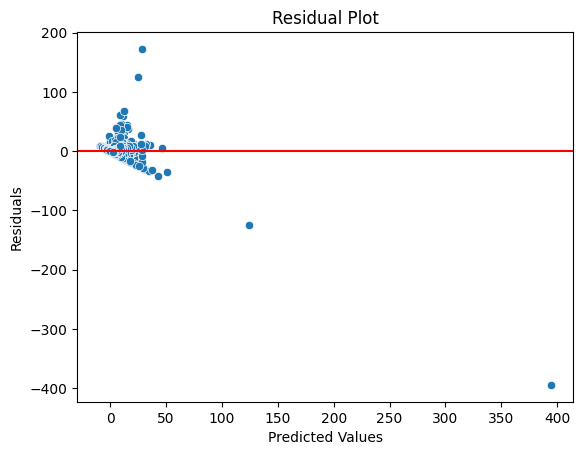

In [ ]:
# Residual plot
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

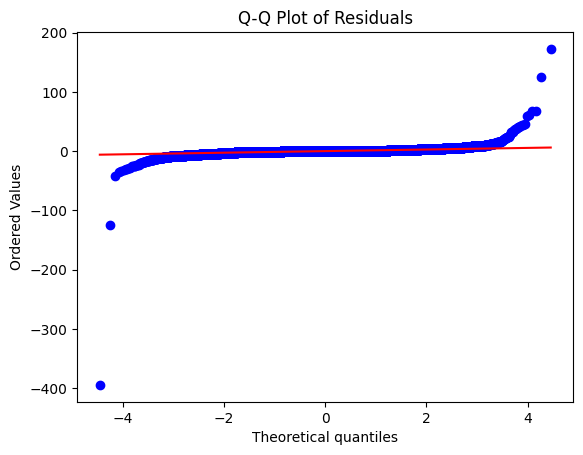

In [ ]:
# Q-Q plot
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Ridge Regression to perform Regularization to check overfitting

In [ ]:
# Extract the features and target variable
X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
        'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
y = taxi_df['tip_amount']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Ridge regression model
alpha = 1.0 
regression_model = Ridge(alpha = alpha)

In [ ]:
# Fit the model to the training data
regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Predict on the test data
y_pred = regression_model.predict(X_test)

In [ ]:
# Evaluate the model using R-squared, MAE, MSE and RMSE
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

R-squared: 0.51
MSE: 3.75
MAE: 0.85
RMSE: 1.94


In [ ]:
# Get the coefficients and intercept of the model
coefficients = regression_model.coef_
print('Coefficients:', coefficients)

intercept = regression_model.intercept_
print('Intercept:', intercept)

Coefficients: [-2.18704226e-02  3.09995621e-05  3.46868903e-05 -2.27283522e+00
 -5.37217144e-02 -1.78005778e-04 -8.08937748e-02  1.30218005e-02
  1.90567545e+00  6.79986678e-02  1.31487621e-01  2.82490679e-02]
Intercept: 1.9241522105852373


#### Using GridSearchCV for selecting optimal value of Alpha

In [ ]:
# Extract the features and target variable
X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
             'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
y = taxi_df['tip_amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge = Ridge()

# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value and corresponding model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Optimal Alpha Value and Model
print("Optimal Alpha by GridSearchCV - ", best_alpha)
print("Optimal Model by GridSearchCV - ", best_model)

# Evaluate the model using R-squared, MAE, MSE and RMSE
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

Optimal Alpha by GridSearchCV -  10.0
Optimal Model by GridSearchCV -  Ridge(alpha=10.0)
R-squared: 0.51
MSE: 3.75
MAE: 0.85
RMSE: 1.94


Model Insight

  <p>No changes in R-squared, MSE, MAE and RMSE values after using Ridge Regularization and GridSearchCV</p>

## Random Forest Regression

In [ ]:
# Extract the features and target variable
X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
             'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
y = taxi_df['tip_amount']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model to the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test data
y_pred = rf_reg.predict(X_test)

In [ ]:
# Evaluate the model using R-squared, MAE, MSE and RMSE
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

R-squared: 0.88
MSE: 0.94
MAE: 0.22
RMSE: 0.97


For our baseline model, we get R-squared: 0.88, MSE: 0.94, MAE: 0.22, RMSE: 0.97

#### AIC and BIC


In [ ]:
# Calculate residuals
residuals = y_test - y_pred

In [ ]:
# Calculate number of observations and number of features
n = len(X_test)
k = len(X_test.columns)

In [ ]:
# Calculate AIC
aic = n * np.log(mse) + 2 * k

In [ ]:
# Calculate BIC
bic = n * np.log(mse) + k * np.log(n)

In [ ]:
print(f'For MSE: {mse:.2f}')
print(f'AIC: {aic:.2f}')
print(f'BIC: {bic:.2f}')

For MSE: 0.94
AIC: -11280.55
BIC: -11160.15


#### Error Distribution Plots

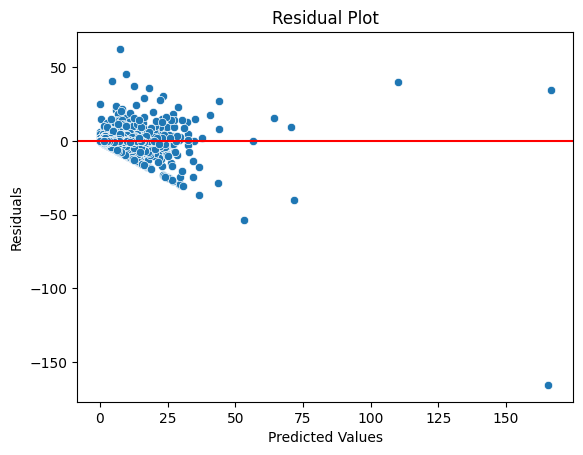

In [ ]:
# Residual plot
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

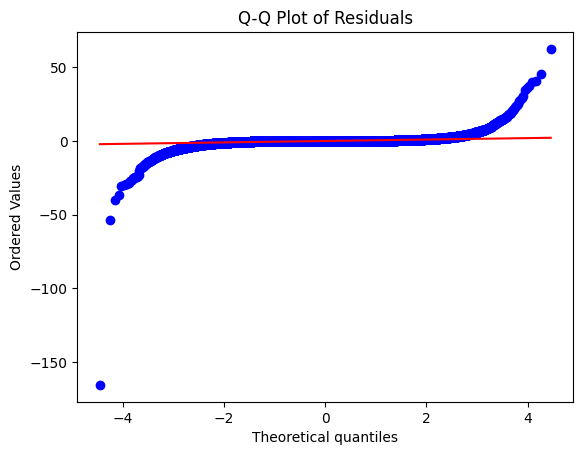

In [ ]:
# Q-Q plot
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Computing Learning Curve to check overfitting

In [ ]:
# Extract the features and target variable
X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
             'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
y = taxi_df['tip_amount']

# Create a Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth = 10)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator=rf_reg, X=X, y=y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training error')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Validation error')
plt.title('Learning curves for Random Forest Regression')
plt.xlabel('Training set size')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_reg.predict(X_test)

# Evaluate the model using R-squared, MAE, MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

KeyboardInterrupt: ignored

In [ ]:
# # Calculate the learning curve
# train_sizes, train_scores, valid_scores = learning_curve(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# # Calculate the average training and validation scores
# train_mean = np.mean(train_scores, axis=1)
# valid_mean = np.mean(valid_scores, axis=1)

# # Plot the learning curve
# plt.plot(train_sizes, train_mean, label='Training error')
# plt.plot(train_sizes, valid_mean, label='Validation error')
# plt.xlabel('Training size')
# plt.ylabel('MSE')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

In [ ]:
# X = taxi_df[['VendorID', 'PULocationID', 'DOLocationID', 'payment_type', 'RatecodeID', 'passenger_count',
#              'trip_distance', 'extra', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']]
# y = taxi_df['tip_amount']

# # Create a Random Forest Regression model
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# # Define the range of training set sizes to use in the learning curve
# train_sizes = np.linspace(0.1, 1.0, 10)

# # Calculate the learning curve scores
# train_sizes, train_scores, validation_scores = learning_curve(rf_reg, X, y, train_sizes=train_sizes, cv=5)

# # Calculate the mean and standard deviation of the training scores and validation scores
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# validation_scores_mean = np.mean(validation_scores, axis=1)
# validation_scores_std = np.std(validation_scores, axis=1)

# # Plot the learning curve
# plt.figure()
# plt.title("Learning Curve")
# plt.xlabel("Training Examples")
# plt.ylabel("Score")
# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
#                  validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
# plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
#          label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()